In [5]:
!pip install tensorflow
!pip install scikit-learn

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/376.0 MB 10.1 MB/s eta 0:00:38
   ---------------------------------------- 3.1/376.0 MB 8.8 MB/s eta 0:00:43
    --------------------------------------- 5.2/376.0 MB 8.2 MB/s eta 0:00:46
    --------------------------------------- 6.8/376.0 MB 8.1 MB/s eta 0:00:46
    --------------------------------------- 8.4/376.0 MB 7.9 MB/s eta 0:00:47
   - -----------------------------

In [35]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------- ----- 1.6/1.8 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 9.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
Note: you may need to restart the kernel to use updated packages.


In [37]:
df = pd.read_csv("boston_housing.csv")
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
df


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [39]:
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [21]:
model = Sequential()
model.add(Dense(256, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(128, activation='relu', name='dense_2'))
model.add(Dense(64, activation='relu', name='dense_3'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

C:\Users\omkar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_output (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,801 (175.00 KB)

 Trainable params: 44,801 (175.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 573.4558 - mse: 573.4558 - val_loss: 554.5716 - val_mse: 554.5716
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 472.8855 - mse: 472.8855 - val_loss: 353.1962 - val_mse: 353.1962
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 244.5274 - mse: 244.5274 - val_loss: 126.5257 - val_mse: 126.5257
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 124.7404 - mse: 124.7404 - val_loss: 107.3567 - val_mse: 107.3567
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 86.6064 - mse: 86.6064 - val_loss: 100.7664 - val_mse: 100.7664
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 74.3617 - mse: 74.3617 - val_loss: 78.4472 - val_mse: 78.4472
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 61.5080 - mse: 61.5080 - val_loss: 72.6081 - val_mse: 72.6081
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 53.2775 - mse: 53.2775 - val_loss: 67.3488 - val_mse: 67.3488
Epoch 9/100
1

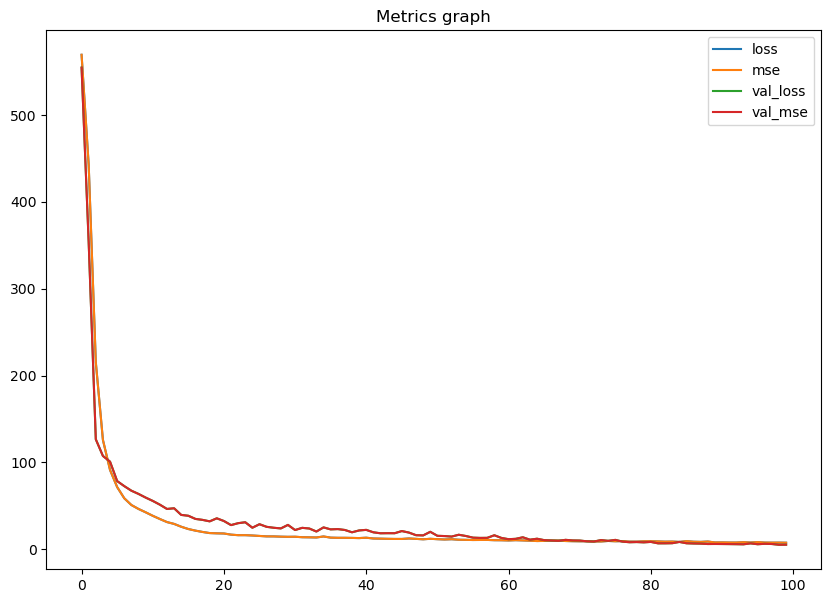

In [27]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [29]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

rmse_nn = np.sqrt(mse_nn)
print('Root Mean Squared Error on test data: ', rmse_nn)

r2_nn = r2_score(y_test, model.predict(X_test))
print('R-squared on test data: ', r2_nn)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.5374 - mse: 22.5374 
Mean squared error on test data:  15.761467933654785
Mean absolute error on test data:  15.761467933654785
Root Mean Squared Error on test data:  3.970071527523753
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R-squared on test data:  0.8050001263618469


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


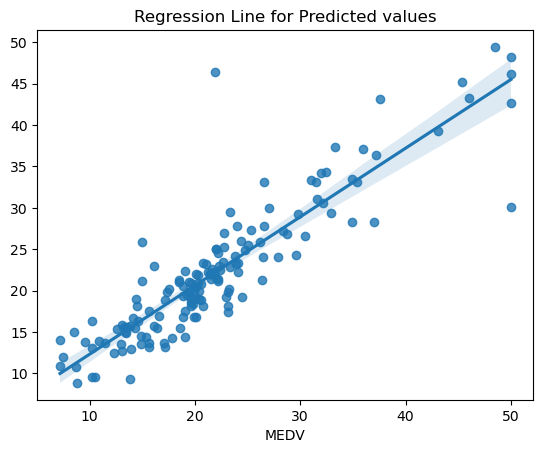

In [31]:
sns.regplot(x=y_test, y=model.predict(X_test))
plt.title("Regression Line for Predicted values")
plt.show()